There's been various concerns about the SHAMs I've made being done correctly. I'm going to take a look at the clustering of them all in the same notebook for easy comparison.

March 1st 2019 : Same as above, but just doing as another notebook for posterity

In [7]:
import numpy as np
import astropy
from halotools.mock_observables import tpcf

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [9]:
%%bash
ls /home/users/swmclau2/scratch/*.hdf5 -ltr

-rw-r--r-- 1 swmclau2 kipac   28562856 Dec 18  2017 /home/users/swmclau2/scratch/catalog_ab_halo_vmax@mpeak_shuffled.hdf5
-rw-r--r-- 1 swmclau2 kipac  794838268 Dec 20  2017 /home/users/swmclau2/scratch/abmatched_halos.hdf5
-rw-r--r-- 1 swmclau2 kipac    8684944 Dec 28  2017 /home/users/swmclau2/scratch/catalog_gama_downsampled_mag_16.hdf5
-rw-r--r-- 1 swmclau2 kipac    1205220 Apr 25  2018 /home/users/swmclau2/scratch/test_trainer.hdf5
-rw-r--r-- 1 swmclau2 kipac   46840815 Apr 25  2018 /home/users/swmclau2/scratch/PearceRedMagicWpCosmo.hdf5
-rw-r--r-- 1 swmclau2 kipac    8612467 May  6  2018 /home/users/swmclau2/scratch/PearceRedMagicWpCosmoTest.hdf5
-rw-r--r-- 1 swmclau2 kipac    1168099 May  9  2018 /home/users/swmclau2/scratch/TestNansTrainer.hdf5
-rw-r--r-- 1 swmclau2 kipac   41309655 May  9  2018 /home/users/swmclau2/scratch/PearceRedMagicWpCosmo2.hdf5
-rw-r--r-- 1 swmclau2 kipac   82607498 Jun 22  2018 /home/users/swmclau2/scratch/PearceRedMagicXiCosmo.hdf5
-rw-r--r-- 1 swmclau

In [10]:
scratch_path = '/home/users/swmclau2/scratch/'

In [15]:
simname = 'darksky'

vpeak_cat = astropy.table.Table.read(scratch_path + 'catalog_ab_halo_vmax@mpeak.hdf5', format = 'hdf5',\
                                    path = 'halo_vmax@mpeak_catalog')
mpeak_cat = astropy.table.Table.read(scratch_path + 'catalog_ab_halo_mpeak.hdf5', format = 'hdf5',\
                                     path = 'halo_mpeak_catalog')
shuffled_cat_mpeak = astropy.table.Table.read(scratch_path+'catalog_ab_halo_mpeak_shuffled.hdf5', format = 'hdf5',\
                                       path = 'halo_mpeak_shuffled')


In [16]:
rbins = np.logspace(-1, 1.5, 15)
rpoints = (rbins[1:]+rbins[:-1])/2

In [17]:
pos = np.c_[vpeak_cat['halo_x'], vpeak_cat['halo_y'],vpeak_cat['halo_z']]
vpeak_xi = tpcf(pos, rbins, period=1000.0)

In [18]:
pos = np.c_[mpeak_cat['halo_x'], mpeak_cat['halo_y'],mpeak_cat['halo_z']]
mpeak_xi = tpcf(pos, rbins, period=1000.0)

In [22]:
pos = np.c_[shuffled_cat_mpeak['halo_x'], shuffled_cat_mpeak['halo_y'],shuffled_cat_mpeak['halo_z']]
shuffled_xi_mpeak = shuffled_xi = tpcf(pos, rbins, period=1000.0)

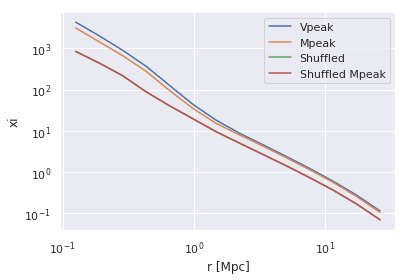

In [23]:
plt.plot(rpoints, vpeak_xi, label = 'Vpeak')
plt.plot(rpoints, mpeak_xi, label = 'Mpeak')
plt.plot(rpoints, shuffled_xi, label = 'Shuffled')
plt.plot(rpoints, shuffled_xi_mpeak, label = 'Shuffled Mpeak')

plt.loglog();
plt.legend(loc='best')
plt.xlabel('r [Mpc]')
plt.ylabel('xi')

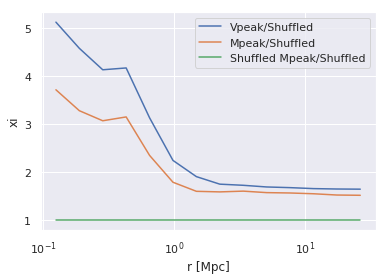

In [24]:
plt.plot(rpoints, vpeak_xi/shuffled_xi, label = 'Vpeak/Shuffled')
plt.plot(rpoints, mpeak_xi/shuffled_xi, label = 'Mpeak/Shuffled')
plt.plot(rpoints, shuffled_xi_mpeak/shuffled_xi, label = 'Shuffled Mpeak/Shuffled')

plt.xscale('log');
plt.legend(loc='best')
plt.xlabel('r [Mpc]')
plt.ylabel('xi')

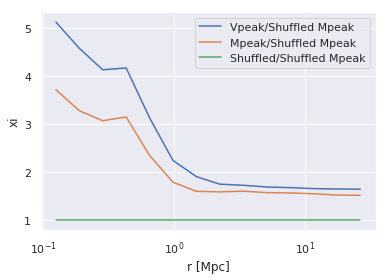

In [25]:
plt.plot(rpoints, vpeak_xi/shuffled_xi_mpeak, label = 'Vpeak/Shuffled Mpeak')
plt.plot(rpoints, mpeak_xi/shuffled_xi_mpeak, label = 'Mpeak/Shuffled Mpeak')
plt.plot(rpoints, shuffled_xi/shuffled_xi_mpeak, label = 'Shuffled/Shuffled Mpeak')

plt.xscale('log');
plt.legend(loc='best')
plt.xlabel('r [Mpc]')
plt.ylabel('xi')